# Netflix Movies and TV Shows 

In this analysis, we aim to gain insights into the content landscape of Netflix by examining a dataset of Netflix movies and TV shows. We will explore three key questions to understand different aspects of the content available on the platform. The questions we will address are as follows:

1. Which countries are leading in Netflix show production?
   - By analyzing the dataset, we will identify the countries that are at the forefront of producing shows for Netflix. This will help us understand the geographic distribution of content creation.

2. Does Netflix have a greater focus on TV shows than movies in recent years?
   - By comparing the number of TV shows and movies released in recent years, we will determine whether Netflix has shifted its focus more towards producing TV shows or if movies still dominate its content library.

3. What are the most common genres in Netflix shows?
   - By examining the dataset, we will identify the genres that are most prevalent among the Netflix shows. This analysis will provide insights into the types of content that are popular on the platform.

By answering these questions, we will gain a deeper understanding of the content available on Netflix, the countries driving content production, the balance between TV shows and movies, and the genres that resonate with Netflix viewers. Let's proceed with the analysis to uncover these insights.

#### About this Dataset: 
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [45]:
import pandas as pd

import matplotlib.pyplot as plt

# PreparingData

## Import

In [8]:
df = pd.read_csv("netflix_titles.csv")
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Clean

In [34]:
# Check the count of missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Seems that number of missing values is huge and can't just drop it as we will lose alot of data.
So, we can fill missing observations with "Unknown"

In [36]:
# Handling missing values in 'director', 'cast', 'country', 'rating', and 'duration'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')

In [37]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


# Data Exploration

In [40]:
# Unique values in 'type', 'rating', and 'listed_in' columns
unique_types = df['type'].unique()
unique_ratings = df['rating'].unique()
unique_genres = df['listed_in'].nunique()

print("Unique Types:\n", unique_types)
print("Unique Ratings:\n", unique_ratings)
print("Unique Genres count:\n", unique_genres)

Unique Types:
 ['Movie' 'TV Show']
Unique Ratings:
 ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'Unknown' 'TV-Y7-FV' 'UR']
Unique Genres:
 514


In [41]:
# Analyze the distribution of movies and TV shows
type_counts = df['type'].value_counts()
print("Distribution of Movies and TV Shows:\n", type_counts)

Distribution of Movies and TV Shows:
 Movie      6131
TV Show    2676
Name: type, dtype: int64


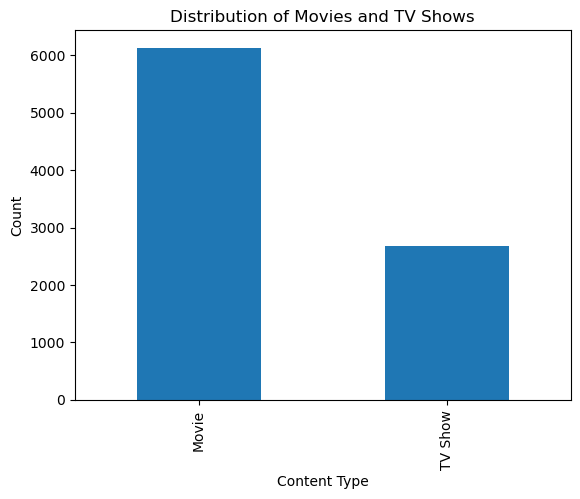

In [46]:
# Plot the distribution of movies and TV shows
fig, ax = plt.subplots()
type_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('Content Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Movies and TV Shows')
plt.show()

In [48]:
# Analyze the release year distribution
year_counts = df['release_year'].value_counts().sort_index()
print("Release Year Distribution:\n", year_counts.head(10))

Release Year Distribution:
 1925    1
1942    2
1943    3
1944    3
1945    4
1946    2
1947    1
1954    2
1955    3
1956    2
Name: release_year, dtype: int64


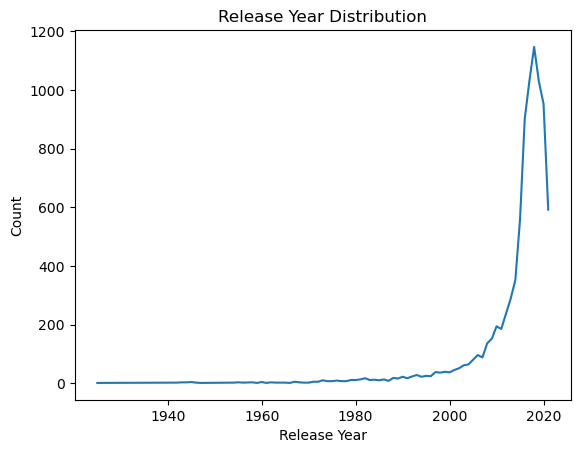

In [47]:
# Analyze the release year distribution
year_counts = df['release_year'].value_counts().sort_index()
# Plot the release year distribution
fig, ax = plt.subplots()
year_counts.plot(kind='line', ax=ax)
ax.set_xlabel('Release Year')
ax.set_ylabel('Count')
ax.set_title('Release Year Distribution')
plt.show()

As known movies and TV shows business is growing and the number ot the shows increasing.

Let's have a look at which countries producing Netflix shows more 

In [43]:
# Analyze the top countries producing movies and TV shows
top_countries = df['country'].value_counts().head(10)
print("Top Countries Producing Movies and TV Shows:\n", top_countries)

Top Countries Producing Movies and TV Shows:
 United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64


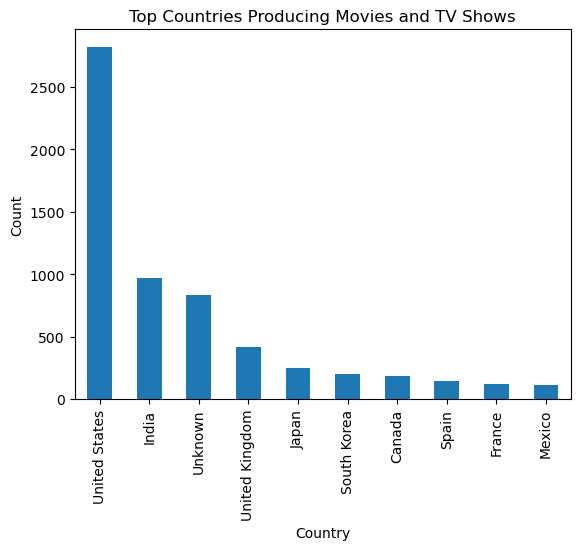

In [49]:
# Plot the top countries producing movies and TV shows
fig, ax = plt.subplots()
top_countries.plot(kind='bar', ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Top Countries Producing Movies and TV Shows')
plt.show()

We can see that United States is the leading country in producing Netflix shows.

So, what are the most popular genres of Netflex shows?

In [44]:
# Analyze the most common genres
genres = df['listed_in'].str.split(', ')
genre_counts = genres.explode().value_counts().head(10)
print("Most Common Genres:\n", genre_counts)

Most Common Genres:
 International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64


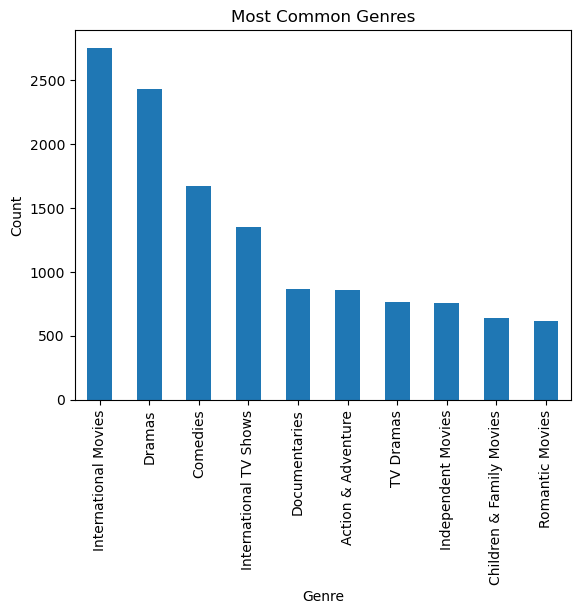

In [50]:
# Plot the most common genres
fig, ax = plt.subplots()
genre_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('Most Common Genres')
plt.show()

#### Does Netflix has more focus on TV Shows than movies in recent years?

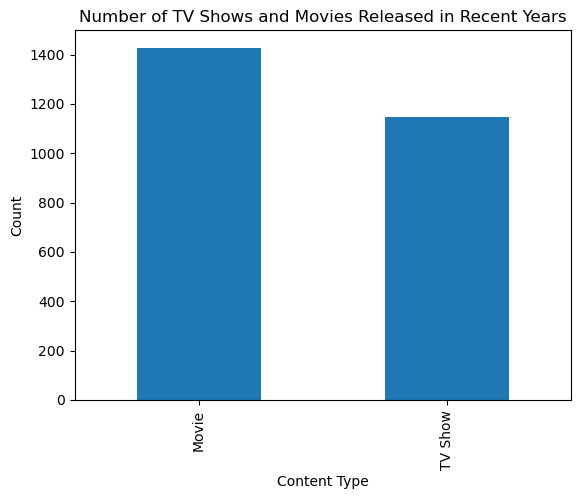

In [51]:
# Filter the data for recent years (e.g., last 5 years)
current_year = pd.to_datetime('today').year
recent_years = range(current_year - 4, current_year + 1)
recent_data = df[df['release_year'].isin(recent_years)]

# Count the number of TV shows and movies released in recent years
type_counts = recent_data['type'].value_counts()

# Plot the number of TV shows and movies released in recent years
fig, ax = plt.subplots()
type_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('Content Type')
ax.set_ylabel('Count')
ax.set_title('Number of TV Shows and Movies Released in Recent Years')
plt.show()


In [52]:
# Determine if Netflix has more focus on TV shows than movies in recent years
focus_on_tv_shows = type_counts['TV Show'] > type_counts['Movie']
if focus_on_tv_shows:
    print("Netflix has more focus on TV Shows than movies in recent years.")
else:
    print("Netflix does not have more focus on TV Shows than movies in recent years.")

Netflix does not have more focus on TV Shows than movies in recent years.


# Conclusions

Based on the analysis conducted, the following conclusions can be drawn:

1. Leading Netflix Shows Production Countries:
   - The United States is the top country in terms of shows production, with 2,818 shows.
   - India is the second leading country with 972 shows.

2. Focus on TV Shows vs. Movies:
   - Netflix does not have more focus on TV shows than movies in recent years. The analysis did not find a higher count of TV shows compared to movies.

3. Most Common Genres:
   - The most common genres in Netflix shows are:
     - International Movies with a count of 2,752.
     - Dramas with a count of 2,427.
     - Comedies with a count of 1,674.
     - International TV Shows with a count of 1,351.

These findings provide insights into the distribution of shows production, the balance between TV shows and movies, and the prevalence of different genres on Netflix. However, it's important to note that this analysis is based on the given dataset and may not represent the entirety of Netflix's content library. Further analysis and exploration of the dataset or additional data sources may provide more comprehensive insights.